In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import platform
from matplotlib import font_manager, rc
matplotlib.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Windows':
    plt.rc('font', family='Malgun Gothic')

# Pandas
데이터 프레임
파이썬에서 데이터를 편리하게 다루기 위해 테이블 구조로 데이터를 처리하는 경우가 많음
파이썬의 pandas 패키지를 사용하여, 제공하는 데이터 프레임을 이용

### 기본 기능
데이터프레임에는 숫자, 문자열, 불리언 등 임의의 타입의 데이터를 담을 수 있음
+ 예제 딕셔너리 타입의 데이터로부터 데이터프레임을 만드는 예를 보임

In [2]:
dic = {'city':['서울', '부산', '대전', '대구', '광주'],
      'year':[2017,2017,2018,2018,2018],
      'temp':[18, 20, 19, 21, 20]}
data = pd.DataFrame(dic)
print(data)

  city  year  temp
0   서울  2017    18
1   부산  2017    20
2   대전  2018    19
3   대구  2018    21
4   광주  2018    20


데이터프레임을 만들면 인덱싱 번호가 자동으로 부여되며 번호는 0부터 시작

컬럼의 배치는 알파벳순으로 정렬, 컬럼의 순서를  바꾸려면 컬럼명을 원하는 순서로 된 리스트로 만들어서 인자로 주면 된다.

In [3]:
data[['year','city','temp']]

,year,city,temp
0,2017,서울,18
1,2017,부산,20
2,2018,대전,19
3,2018,대구,21
4,2018,광주,20


## 인덱스
인덱스를 임의의 이름으로 지정할 수 있음

In [4]:
data.index = ['a', 'b', 'c', 'd', 'e']
print(data)

  city  year  temp
a   서울  2017    18
b   부산  2017    20
c   대전  2018    19
d   대구  2018    21
e   광주  2018    20


컬럼 이름을 변경

In [5]:
data.columns = ['도시', '연도', '날씨']

특정한 **컬럼의 내용**만 얻기
1. 컬럼의 이름을 [] 내의 인자로 지정하는 방법
2. 컬림 이름을 속성 값으로 취급하여 "." 연산을 이용하는 방법

+ 컬럼명으로 접근(data['연도'])
+ 속성값으로 접근(data.연도)

데이터프레임에서 특정 행을 얻는 방법에는 두 가지가 있음
인덱스를 사용하는 방법 loc()을 사용하는 방법

In [6]:
data.loc['b']

도시      부산
연도    2017
날씨      20
Name: b, dtype: object

인덱스가 아니라 행의 위치를 지정하는 방법
이때는 iloc()을 사용
":"를 사용하여 행의 범위를 지정 가능

In [7]:
data.iloc[1:3]

,도시,연도,날씨
b,부산,2017,20
c,대전,2018,19


인덱스를 임의의 컬럼을 재배정할 수 있음

In [8]:
data.set_index(['도시'], inplace=True)
print(data)

      연도  날씨
도시          
서울  2017  18
부산  2017  20
대전  2018  19
대구  2018  21
광주  2018  20


## 행 출력

In [9]:
data.loc['서울'];data

,연도,날씨
도시,,
서울,2017,18
부산,2017,20
대전,2018,19
대구,2018,21
광주,2018,20


In [10]:
data.iloc[1:2]

,연도,날씨
도시,,
부산,2017,20


## 컬럼 추가
새로운 컬럼을 추가하려면 현재 없는 컬럼명을 인자로 주면 새로운 컬럼이 자동으로 생성된다.

In [11]:
cars = [50,40,20,30,10]
data['car'] = cars;data

,연도,날씨,car
도시,,,
서울,2017,18,50
부산,2017,20,40
대전,2018,19,20
대구,2018,21,30
광주,2018,20,10


In [12]:
data['high'] =data.car>=30; data

,연도,날씨,car,high
도시,,,,
서울,2017,18,50,True
부산,2017,20,40,True
대전,2018,19,20,False
대구,2018,21,30,True
광주,2018,20,10,False


In [14]:
data['high'] = data.날씨>=20
print(data)

      연도  날씨  car   high
도시                      
서울  2017  18   50  False
부산  2017  20   40   True
대전  2018  19   20  False
대구  2018  21   30   True
광주  2018  20   10   True


In [22]:
# data.columns = [ 'year', 'temp', 'car', 'high']

KeyError: "None of ['index'] are in the columns"

In [18]:
print(data)

    year  temp  car   high
도시                        
서울  2017    18   50  False
부산  2017    20   40   True
대전  2018    19   20  False
대구  2018    21   30   True
광주  2018    20   10   True


index 되돌리기

특정 컬럼을 삭제하려면 drop을 사용
drop 함수를 호출 할 때 인자 값으로 0이나 1을 줄 수 있는데 
+ 1의 의미는 컬럼을 기준으로 삭제를 하라는 뜻

In [23]:
data.drop(['car', 'high'], 1)

,year,temp
도시,,
서울,2017,18
부산,2017,20
대전,2018,19
대구,2018,21
광주,2018,20


In [25]:
data.reset_index()
#set_index의 역할 반대
#reset_index()
# https://kongdols-room.tistory.com/123

,도시,year,temp,car,high
0,서울,2017,18,50,False
1,부산,2017,20,40,True
2,대전,2018,19,20,False
3,대구,2018,21,30,True
4,광주,2018,20,10,True


## apply
함수를 편리하게 데이터에 일괄 적용하는 방법으로 apply가 있음
아래는 최대값 - 최소값을 계산하는 함수를 정의하고 이를 데이터에 적용하는 예

In [28]:
f = lambda x: x.max() - x.min()
df = pd.DataFrame(np.arange(12).reshape(4,3), columns=['A','B','C'], index = ['a','b','c','d'])
print(df)

   A   B   C
a  0   1   2
b  3   4   5
c  6   7   8
d  9  10  11


In [29]:
df.apply(f)

A    9
B    9
C    9
dtype: int64

행에 대해서 함수를 적용하려면 (좌에서 우로 수행) 인자 axis = 1로 지정

In [30]:
df.apply(f,axis=1)

a    2
b    2
c    2
d    2
dtype: int64

In [31]:
df.apply(f,axis=0)

A    9
B    9
C    9
dtype: int64

## Series
판다스는 시리즈 객체를 제공하는데 이를 컬럼이 하나뿐인 데이터프레임이다.
즉, 특수한 구조의 데이터프레임이라고 할 수 있음

In [32]:
region = pd.Series(['서울','부산','대전','대구','광주'], index = ['1','2','3','4','5'])
print(region)

1    서울
2    부산
3    대전
4    대구
5    광주
dtype: object


## 그래프
시각화의 기본사항
``` python
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame, Series
from numpy.random import randn
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
#맥 사용자만 해당 retina 해상도 지원
```

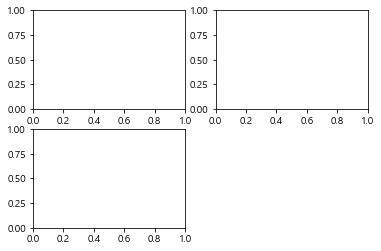

In [33]:
fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)

히스토그램, 산점도, 랜덤넘버 그래프를 그리기

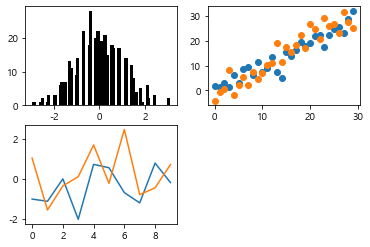

In [35]:
ax1.hist(np.random.randn(200), bins=20, color='k',rwidth=0.5)
ax2.scatter(np.arange(30), np.arange(30)+3*np.random.randn(30))
ax3.plot(np.arange(10), np.random.randn(10))
fig

같은 코드를 두 번 실행하면 그림을 계속 겹쳐서 그리는 것을 알 수 있다.

2*2 = 4 개의 그림을 그리는 예임

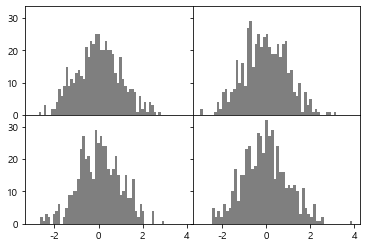

In [36]:
fig, axes = plt.subplots(2,2, sharex = True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.randn(500), bins=50, color='k', alpha=0.5)
        plt.subplots_adjust(wspace=0, hspace=0)

1000개의 랜덤넘버 (정규분포)의 누적 값을 그리는 예이다.

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plt(randn)